## This script takes individual files with MAG kofam annotations and compares gene representation in KEGG categories across categories. 

### Import all the dependencies

In [1]:
import os as os
import numpy as np
import pandas as pd
import glob as glob

### Navigate to working directory

In [2]:
os.chdir('/Users/nastassia.patin/Desktop/Projects/BlueHole/MAG_kofams')

### Import the "master" KO htext file and reformat it

In [3]:
# provide the directory where the master KO Orthology file is located
path = '/Users/nastassia.patin/Desktop/Workflows/KO_Orthology_ko00001.txt'

In [4]:
ko_master = pd.read_csv(path, sep='\t', header=None,
                       names=['Group','Subgroup1','Subgroup2','KO'])
ko_master.head()

,Group,Subgroup1,Subgroup2,KO
0,09100 Metabolism,09101 Carbohydrate metabolism,00010 Glycolysis / Gluconeogenesis [PATH:ko00010],K00844 HK; hexokinase [EC:2.7.1.1]
1,09100 Metabolism,09101 Carbohydrate metabolism,00010 Glycolysis / Gluconeogenesis [PATH:ko00010],K12407 GCK; glucokinase [EC:2.7.1.2]
2,09100 Metabolism,09101 Carbohydrate metabolism,00010 Glycolysis / Gluconeogenesis [PATH:ko00010],K00845 glk; glucokinase [EC:2.7.1.2]
3,09100 Metabolism,09101 Carbohydrate metabolism,00010 Glycolysis / Gluconeogenesis [PATH:ko00010],"K01810 GPI, pgi; glucose-6-phosphate isomeras..."
4,09100 Metabolism,09101 Carbohydrate metabolism,00010 Glycolysis / Gluconeogenesis [PATH:ko00010],"K06859 pgi1; glucose-6-phosphate isomerase, a..."


### The following steps edit the master file so the fields only contain text information about the gene function. They are optional if you want to keep the numerical codes associated with groups and subgroups.

In [5]:
# Split the function from the KO
ko_master[['KO', 'Function']] = ko_master['KO'].str.split(" ", n=1, expand=True)
# Split out the number label for groups and subgroups
ko_master[['Subgroup2', 'PATH']] = ko_master['Subgroup2'].str.split("[", n=1, expand=True)
ko_master = ko_master.drop('PATH', axis=1)
# Split out the number label for groups and subgroups
ko_master[['GroupNum', 'Group']] = ko_master['Group'].str.split(" ", n=1, expand=True)
ko_master = ko_master.drop('GroupNum', axis=1)
# Split out the number label for groups and subgroups
ko_master[['GroupNum', 'Subgroup1']] = ko_master['Subgroup1'].str.split(" ", n=1, expand=True)
ko_master = ko_master.drop('GroupNum', axis=1)
# Split out the number label for groups and subgroups
ko_master[['GroupNum', 'Subgroup2']] = ko_master['Subgroup2'].str.split(" ", n=1, expand=True)
ko_master = ko_master.drop('GroupNum', axis=1)
ko_master.head()

,Group,Subgroup1,Subgroup2,KO,Function
0,Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis,K00844,HK; hexokinase [EC:2.7.1.1]
1,Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis,K12407,GCK; glucokinase [EC:2.7.1.2]
2,Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis,K00845,glk; glucokinase [EC:2.7.1.2]
3,Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis,K01810,"GPI, pgi; glucose-6-phosphate isomerase [EC:5..."
4,Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis,K06859,"pgi1; glucose-6-phosphate isomerase, archaeal..."


### Import all MAG KO lists and make a data frame with all annotations

In [6]:
def ko_function(kos, master, name):
    ko_list = list(kos['KO'])
    # extract only KOs that are in the ko_sd_list
    kos_funct = ko_master.loc[ko_master['KO'].isin(ko_list), :]
    # filter out irrelevant categories
    exclude = ['Human Diseases','Brite Hierarchies','Organismal Systems',
                                    'Cellular community - eukaryotes']
    kos_funct_filt = kos_funct.loc[~kos_funct['Group'].str.contains('|'.join(exclude))]
    kos_funct_filt['MAG'] = name
    return(kos_funct_filt)

In [7]:
genecontent = []
for file in glob.glob("*.txt"):
    kos = pd.read_csv(file, sep='\t', names=['ORF', 'KO'])
    a, b = file.split('.')
    c, d, e, f = a.split('_')
    name = c + '_' + d + '_' + e
    df = ko_function(kos, ko_master, name)
    genecontent.append(df)

genecontent_df = pd.concat(genecontent)

<ipython-input-6-ef59d8da87a4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kos_funct_filt['MAG'] = name


In [8]:
genecontent_df['MAG'].unique()

array(['BH_Deeps_011', 'BH_Deeps_008', 'BH_Deeps_005', 'BH_Deeps_002',
       'BH_Deeps_016', 'BH_Deeps_007', 'BH_Deeps_004', 'BH_Deeps_001',
       'BH_Deeps_010', 'BH091995M_bbnorm_021', 'BH_Deeps_003',
       'BH_Deeps_012'], dtype=object)

In [9]:
genecontent_df.head()

,Group,Subgroup1,Subgroup2,KO,Function,MAG
3,Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis,K01810,"GPI, pgi; glucose-6-phosphate isomerase [EC:5...",BH_Deeps_011
19,Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis,K01624,"FBA, fbaA; fructose-bisphosphate aldolase, cl...",BH_Deeps_011
20,Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis,K01622,"K01622; fructose 1,6-bisphosphate aldolase/ph...",BH_Deeps_011
23,Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis,K01803,"TPI, tpiA; triosephosphate isomerase (TIM) [E...",BH_Deeps_011
24,Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis,K00134,"GAPDH, gapA; glyceraldehyde 3-phosphate dehyd...",BH_Deeps_011


### Replace MAG name with taxonomy

In [10]:
taxa = pd.read_csv("MAG_taxa.csv", names=['MAG', 'Taxonomy'])
taxa = pd.Series(taxa.Taxonomy.values, index=taxa.MAG).to_dict()
genecontent_df = genecontent_df.replace({"MAG": taxa})

## Group genes by category and make bar charts

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

### Group by the highest category ("Group") and get counts for each category

In [26]:
mag_group = genecontent_df.groupby(['MAG', 'Group'])['Subgroup1'].count()
mag_group = mag_group / mag_group.groupby(level=0).sum()
mag_group

MAG                      Group                               
BH20 (Thioglobaceae)     Cellular Processes                      0.037412
                         Environmental Information Processing    0.059656
                         Genetic Information Processing          0.173913
                         Metabolism                              0.603640
                         Not Included in Pathway or Brite        0.125379
BH21 (Woesearchaeota)    Cellular Processes                      0.050633
                         Environmental Information Processing    0.050633
                         Genetic Information Processing          0.535865
                         Metabolism                              0.185654
                         Not Included in Pathway or Brite        0.177215
BH22 (Patescibacteria)   Cellular Processes                      0.050000
                         Environmental Information Processing    0.063158
                         Genetic Information Proce

In [27]:
df_group = pd.DataFrame(mag_group).reset_index()

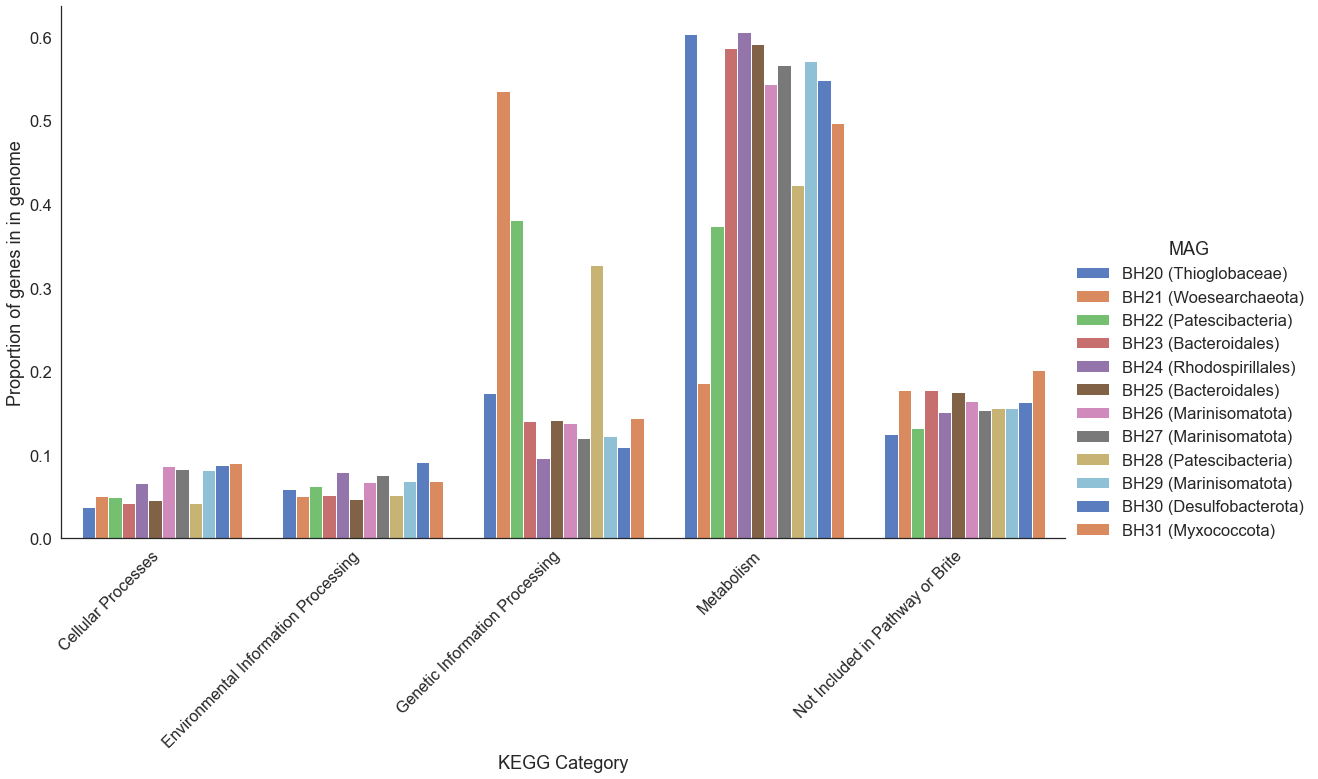

In [28]:
sns.set(font_scale=1.5, style="white")
fig = sns.catplot(x="Group", y="Subgroup1", hue="MAG", data=df_group, kind='bar' , height=8.27, aspect=15/8.27,
                 palette=sns.color_palette("muted")) 
fig.set_axis_labels("KEGG Category", "Proportion of genes in in genome", fontsize=18)
fig.set_xticklabels(rotation=45, ha='right', fontsize=16)

In [21]:
fig.savefig("BH_Deeps_MAGs_genecontent.png")

### Look at only the 'Metabolism' genes

In [29]:
mag_group = genecontent_df.groupby(['MAG', 'Group', 'Subgroup1'])['Subgroup2'].count()
mag_group = mag_group / mag_group.groupby(level=0).sum()
df_group = pd.DataFrame(mag_group)
df_group_metab = df_group.loc[(slice(None), ['Metabolism']), :] 
df_group_metab.head()

Subgroup2
MAG                  Group      Subgroup1                                             
BH20 (Thioglobaceae) Metabolism Amino acid metabolism                         0.131446
                                Biosynthesis of other secondary metabolites   0.022245
                                Carbohydrate metabolism                       0.097068
                                Energy metabolism                             0.102123
                                Glycan biosynthesis and metabolism            0.025278

In [30]:
df_group_metab = df_group_metab.reset_index()

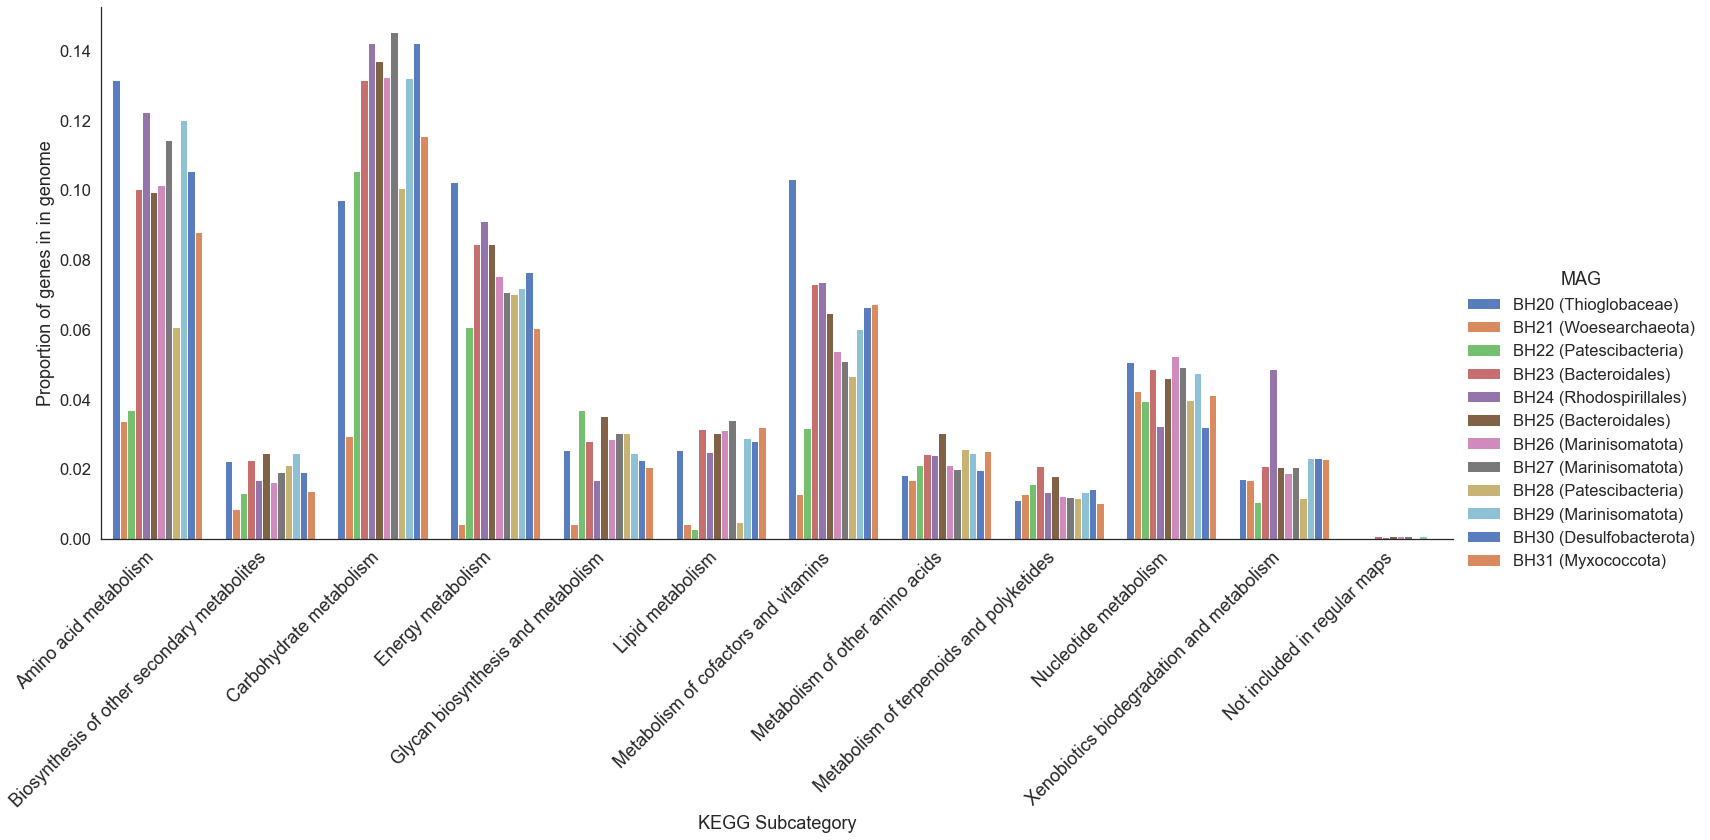

In [32]:
sns.set(font_scale=1.5, style="white")
fig = sns.catplot(x="Subgroup1", y="Subgroup2", hue="MAG", data=df_group_metab, kind='bar' , height=8.27, 
                  aspect=20/8.27, palette=sns.color_palette("muted")) 
fig.set_axis_labels("KEGG Subcategory", "Proportion of genes in in genome", fontsize=18)
fig.set_xticklabels(rotation=45, ha='right', fontsize=18)

In [33]:
fig.savefig("BH_Deeps_MAGs_metabolism_genecontent.png")

### Look at only the 'Genetic Information Processing' genes

In [35]:
df_group_genetic = df_group.loc[(slice(None), ['Genetic Information Processing']), :] 
df_group_genetic.head()

Subgroup2
MAG                   Group                          Subgroup1                                  
BH20 (Thioglobaceae)  Genetic Information Processing Folding, sorting and degradation   0.040445
                                                     Replication and repair             0.051567
                                                     Transcription                      0.003033
                                                     Translation                        0.078868
BH21 (Woesearchaeota) Genetic Information Processing Folding, sorting and degradation   0.063291

In [36]:
df_group_genetic = df_group_genetic.reset_index()

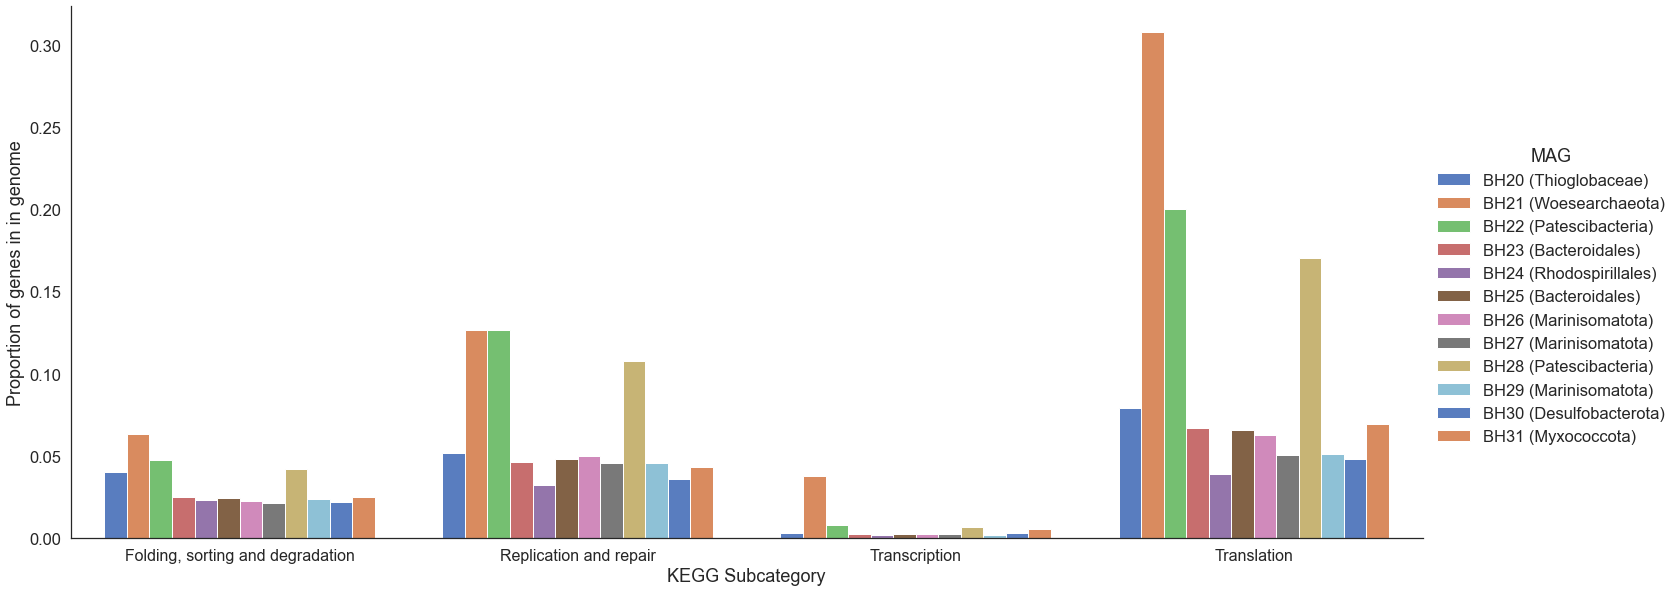

In [37]:
sns.set(font_scale=1.5, style="white")
fig = sns.catplot(x="Subgroup1", y="Subgroup2", hue="MAG", data=df_group_genetic, kind='bar' , height=8.27, 
                  aspect=20/8.27, palette=sns.color_palette("muted")) 
fig.set_axis_labels("KEGG Subcategory", "Proportion of genes in in genome", fontsize=18)
fig.set_xticklabels(fontsize=16)

In [38]:
fig.savefig("BH_Deeps_MAGs_genetic_genecontent.png")

### Look at only the 'Environmental Information Processing' genes

In [24]:
df_group_eip = df_group.loc[(slice(None), ['Environmental Information Processing']), :] 
df_group_eip.head()

Subgroup2
MAG                    Group                                Subgroup1                     
BH20 (Thioglobaceae)   Environmental Information Processing Membrane transport    0.033367
                                                            Signal transduction   0.026289
BH21 (Woesearchaeota)  Environmental Information Processing Membrane transport    0.012658
                                                            Signal transduction   0.037975
BH22 (Patescibacteria) Environmental Information Processing Membrane transport    0.028947

In [25]:
df_group_eip = df_group_eip.reset_index()

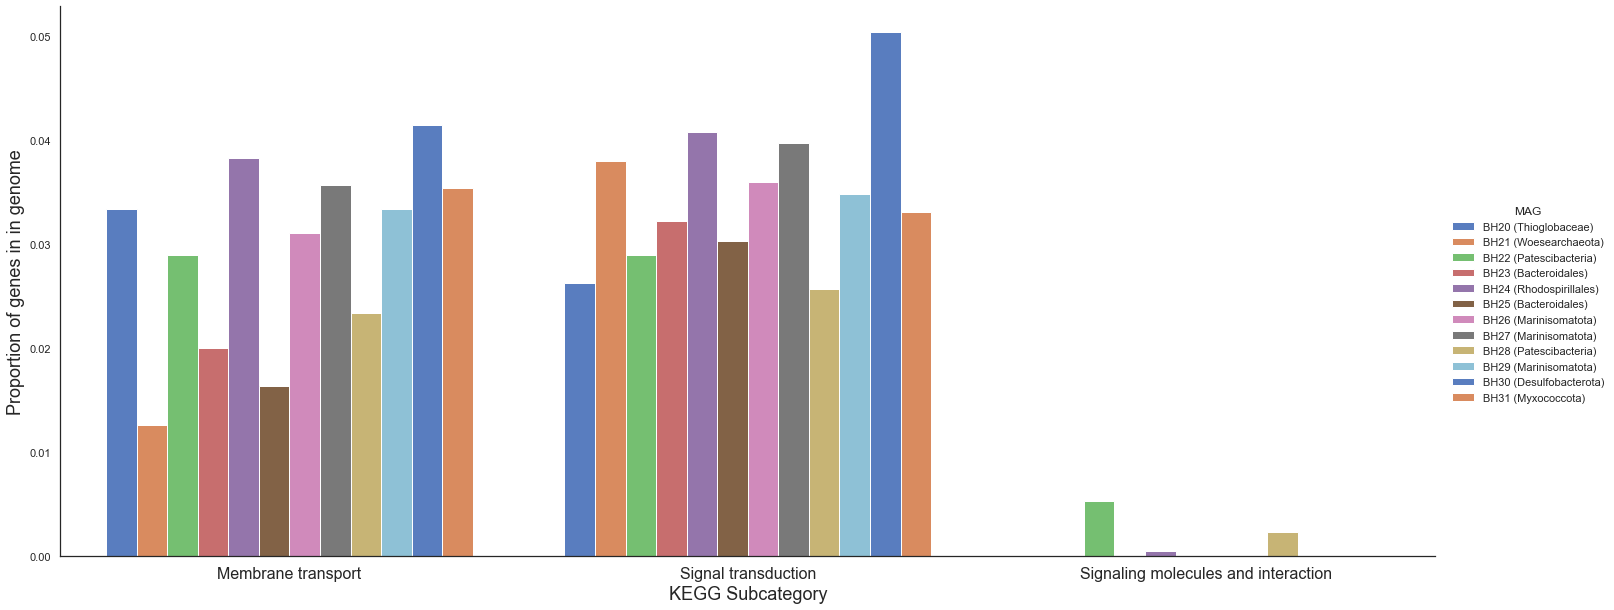

In [26]:
sns.set(style="white")
sns.set_color_codes("muted")
fig = sns.catplot(x="Subgroup1", y="Subgroup2", hue="MAG", data=df_group_eip, kind='bar' , height=8.27, 
                  aspect=20/8.27, palette=sns.color_palette("muted")) 
fig.set_axis_labels("KEGG Subcategory", "Proportion of genes in in genome", fontsize=18)
fig.set_xticklabels(fontsize=16)

In [27]:
fig.savefig("BH_Deeps_MAGs_EIP_genecontent.png")

### Look at only "Energy metabolisms" genes

In [28]:
mag_group = genecontent_df.groupby(['MAG', 'Group', 'Subgroup1',
                                    'Subgroup2'])['KO'].count()
mag_group = mag_group / mag_group.groupby(level=0).sum()
df_group = pd.DataFrame(mag_group)
df_group_energymetab = df_group.loc[(slice(None), slice(None), ['Energy metabolism']), :] 
df_group_energymetab.head()

KO
MAG                  Group      Subgroup1         Subgroup2                                             
BH20 (Thioglobaceae) Metabolism Energy metabolism Carbon fixation in photosynthetic organisms   0.012133
                                                  Carbon fixation pathways in prokaryotes       0.010111
                                                  Methane metabolism                            0.012133
                                                  Nitrogen metabolism                           0.011122
                                                  Oxidative phosphorylation                     0.033367

In [29]:
df_group_energymetab = df_group_energymetab.reset_index()

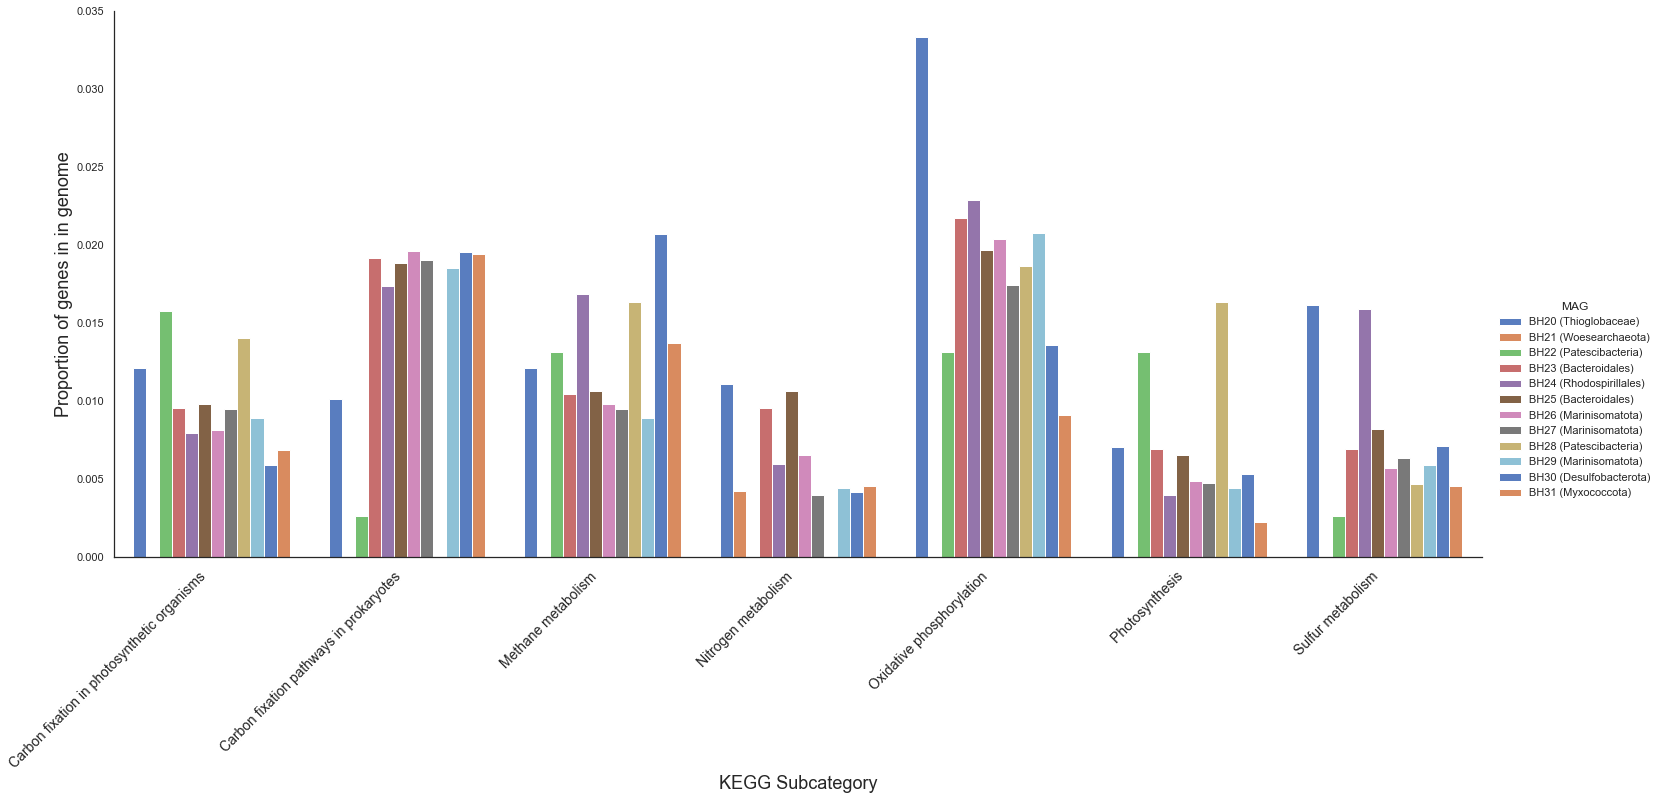

In [30]:
sns.set(style="white")
sns.set_color_codes("muted")
fig = sns.catplot(x="Subgroup2", y="KO", hue="MAG", data=df_group_energymetab, kind='bar' , height=8.27, 
                  aspect=20/8.27, palette=sns.color_palette("muted")) 
fig.set_axis_labels("KEGG Subcategory", "Proportion of genes in in genome", fontsize=18) 
fig.set_xticklabels(rotation=45, ha='right', fontsize=14)

In [31]:
fig.savefig("BH_Deeps_MAGs_energymetab_genecontent.png")

In [32]:
mag_group = genecontent_df.groupby(['MAG', 'Group', 'Subgroup1',
                                    'Subgroup2'])

In [33]:
mag_group.head()

,Group,Subgroup1,Subgroup2,KO,Function,MAG
3,Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis,K01810,"GPI, pgi; glucose-6-phosphate isomerase [EC:5...",BH28 (Patescibacteria)
19,Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis,K01624,"FBA, fbaA; fructose-bisphosphate aldolase, cl...",BH28 (Patescibacteria)
20,Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis,K01622,"K01622; fructose 1,6-bisphosphate aldolase/ph...",BH28 (Patescibacteria)
23,Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis,K01803,"TPI, tpiA; triosephosphate isomerase (TIM) [E...",BH28 (Patescibacteria)
24,Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis,K00134,"GAPDH, gapA; glyceraldehyde 3-phosphate dehyd...",BH28 (Patescibacteria)
...,...,...,...,...,...,...
51541,Not Included in Pathway or Brite,Poorly characterized,Function unknown,K06871,K06871; uncharacterized protein,BH29 (Marinisomatota)
51549,Not Included in Pathway or Brite,Poorly characterized,Function unknown,K06888,K06888; uncharacterized protein,BH29 (Marinisomatota)
51550,Not Included in Pathway or Brite,Poorly characterized,Function unknown,K06889,K06889; uncharacterized protein,BH29 (Marinisomatota)
51560,Not Included in Pathway or Brite,Poorly characterized,Function unknown,K06911,K06911; uncharacterized protein,BH29 (Marinisomatota)


In [37]:
genecontent_df.to_csv("All_MAGs_genecontent.csv", index=None)